In [1]:
import re
import pandas as pd
from konlpy.tag import Okt
from gensim import corpora, models

stopwords = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '과', '와', '의', '로', '으로', '하다', '이다','한', '했다', '하고' ,'인','적','한','상'
    ,'게', '거', '말', '간', '축', '책', '작가', '이야기', '작품', '선', '란', '개', '다시', '독자', '베스트셀러', '정세랑', '김영하', '스', '대', '됭',
    '곤', '위', '된다', '지', '윤재', '출', '속', '소설', '장편소설', '자이니치', '사라마구'
    # 추가적인 불용어 추가
]

# 데이터 로드
data = pd.read_csv(r"동덕여대_전처리_완료.csv")  

# 전처리를 위한 토크나이저 생성
tokenizer = Okt()

# 전처리 함수 정의
def preprocess_text(text):
    tokens = tokenizer.morphs(text)  # 형태소 분석
    tokens = [re.sub('[\[\],\']', '', token) for token in tokens]  # '['와 ']' 사이의 문자 및 ',' 제거
    tokens = [token for token in tokens if token not in stopwords]  # 불용어 제거
    tokens = [token for token in tokens if token]  # Remove empty tokens
    # 추가적인 전처리 작업 수행
    return tokens

In [2]:
data

,도서명,저자,출판사,발행연도,대출횟수,카테고리,저자소개,책소개
0,아몬드,손원평,창비,년 월 일,31,소설시희곡,"['태어났다', '서강대', '사회학', '철학', '공부', '했고', '영화아카...","['공감', '불능', '사회', '차가', '움', '녹이는', '아몬드', '매..."
1,파친코 세트,이민진 이미정,문학사상,년 월 일,31,소설시희곡,"['세계', '뜨거운', '관심', '사랑', '받고', '계', '미국인', '소...","['상품', '데', '서', '구성', '상품', '낱개', '반품', '불가',..."
2,채식주의자,한강,창비,년 월 일,25,소설시희곡,"['늦은', '태어났다', '연세대', '국문과', '졸업', '뒤', '문학', ...","['인터내셔널', '부', '커', '산클레멘테', '문학상', '수상', '작전'..."
3,불편한 편의점,김호연,나무옆의자,년 월 일,23,소설시희곡,"['영화', '만화', '소설', '넘나', '들며', '온갖', '이야기', '써...","['최고', '재미', '감동', '선사', '힐링', '소설', '원조', '주요..."
4,지구 끝의 온실,김초엽,자이언트북스,년 월 일,22,소설시희곡,"['소설가', '년생', '포스텍', '화학', '전공', '생화학', '석사', ...","['김', '초연', '첫', '장편소설', '간절히', '기다려', '온', '이..."
5,칵테일 러브 좀비,조예은,안전가옥,년 월 일,21,소설시희곡,"['황금가지', '타임', '리프', '공모전', '오버', '랩', '나이프', ...","['안전가옥', '쇼트', '시리즈', '두', '번째', '책', '조예', '작..."
6,물고기는 존재하지 않는다,룰루 밀러 정지인,곰출판,년 월 일,19,자연과학,"['방송', '계', '퓰리처상', '불리는', '피어', '버디', '수상한', ...","['방송', '계', '퓰리처상', '피버디상', '수상자', '룰루', '밀러',..."
7,밝은 밤,최은영,문학동네,년 월 일,19,소설시희곡,"['삼색', '고양이', '날', '태어나', '삼색', '고양이', '고등어', ...","['백', '감싸', '안으며', '이어지는', '사랑', '숨', '기록', '쇼..."
8,공간의 미래,유현준,을유문화사,년 월 일,17,인문,"['홍익대학교', '건축', '대학교수', '주유', '현준', '건축사', '사무...","['사는', '공간', '안', '사는', '변화', '맞춰', '변화', '왔다'..."
9,영화와 로봇 사회학,민경배,커뮤니케이션북스,년 월 일,16,사회 정치,"['경희사이버대', '미디어', '커뮤니케이션학', '교수', '고려대학교', '사...","['인공', '지능', '로봇', '빠르게', '사회', '영역', '도입', '되..."


In [3]:
from gensim.models import Word2Vec
from gensim.corpora import Dictionary
import nltk

In [4]:
# 텍스트 전처리
data['preprocessed'] = data['책소개'].apply(preprocess_text) 

In [5]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [6]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
사회: 0.0046
치료: 0.0046
로봇: 0.0041
새로운: 0.0041
방법: 0.0041
감정: 0.0036
업무: 0.0036
이민: 0.0036
못: 0.0031
존재: 0.0031

토픽 2:
일기: 0.0108
탈: 0.0092
코: 0.0073
코르셋: 0.0053
삶: 0.0053
편의점: 0.0045
밤: 0.0045
독수리: 0.0045
후속작: 0.0041
사랑: 0.0041

토픽 3:
세계: 0.0065
주제: 0.0044
눈: 0.0044
새로운: 0.0037
대표: 0.0037
모든: 0.0037
전체주의: 0.0037
사랑: 0.0030
의미: 0.0030
영화: 0.0030

토픽 4:
부: 0.0066
광고: 0.0059
집: 0.0054
죽음: 0.0054
삶: 0.0048
세계: 0.0048
하며: 0.0048
대한: 0.0031
될: 0.0031
변화: 0.0030

토픽 5:
여성: 0.0097
페이스북: 0.0041
기계: 0.0041
혐오: 0.0037
용기: 0.0037
저자: 0.0037
삶: 0.0033
사회: 0.0033
김훈: 0.0032
안중근: 0.0032



In [7]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.4091499497192054


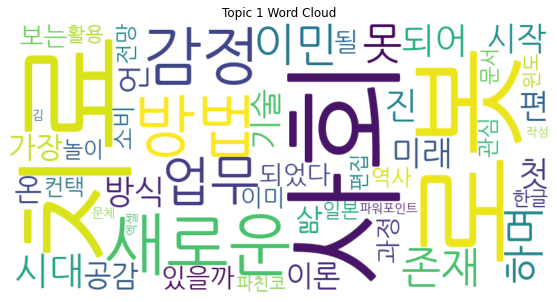

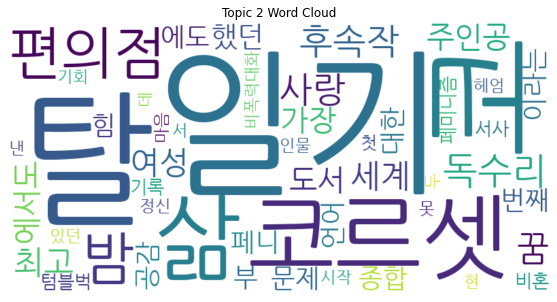

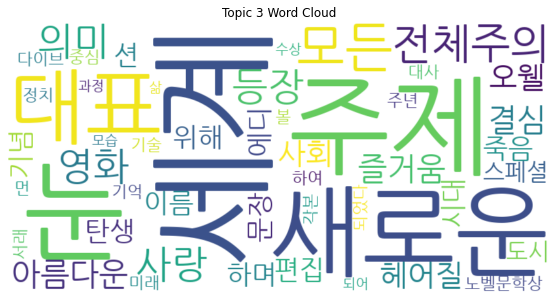

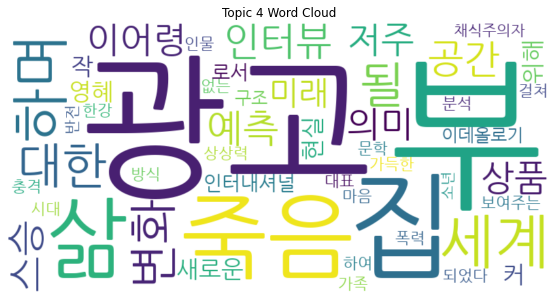

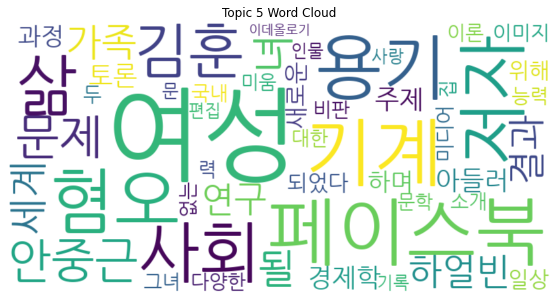

In [8]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()

In [9]:
# 텍스트 전처리
data['preprocessed'] = data['저자소개'].apply(preprocess_text) 

In [10]:
word2vec_model = Word2Vec(data['preprocessed'], min_count=1)

dictionary = Dictionary()
dictionary.doc2bow(word2vec_model.wv.index_to_key, allow_update=True)

# 단어 사전 및 문서-단어 행렬 생성
# dictionary = corpora.Dictionary(data['preprocessed'])
corpus = [dictionary.doc2bow(doc) for doc in data['preprocessed']]

In [11]:
# LDA 모델 훈련
num_topics = 5 # 토픽 개수
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# 토픽별 단어 출력
for topic_idx in range(num_topics):
    print(f"토픽 {topic_idx+1}:")
    words = lda_model.show_topic(topic_idx, topn=10)
    for word, prob in words:
        print(f"{word}: {prob:.4f}")
    print() 

토픽 1:
건축: 0.0132
대학교: 0.0052
집필: 0.0042
관: 0.0042
미국: 0.0042
기획: 0.0042
교육: 0.0042
건축가: 0.0042
세계: 0.0032
이자: 0.0032

토픽 2:
트렌드: 0.0083
그림: 0.0068
엑셀: 0.0053
시작: 0.0046
회사: 0.0046
집: 0.0046
여행: 0.0046
미디어: 0.0039
통: 0.0038
법: 0.0038

토픽 3:
감독: 0.0109
문학: 0.0061
집: 0.0057
대학: 0.0048
하며: 0.0040
되었다: 0.0040
각본: 0.0040
박찬욱: 0.0040
활동: 0.0035
세계: 0.0031

토픽 4:
심리학: 0.0067
영화: 0.0062
사회: 0.0057
연구: 0.0057
대학: 0.0052
철학: 0.0047
수상했다: 0.0042
아들러: 0.0042
전공: 0.0042
경제학: 0.0037

토픽 5:
트렌드: 0.0080
영국: 0.0064
활동: 0.0060
시작: 0.0051
라이프: 0.0047
집: 0.0039
세계: 0.0039
발표: 0.0039
글: 0.0034
했고: 0.0034



In [12]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(model=lda_model, texts=data['preprocessed'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("일관성 점수:", coherence_score)

일관성 점수: 0.34198216996811803


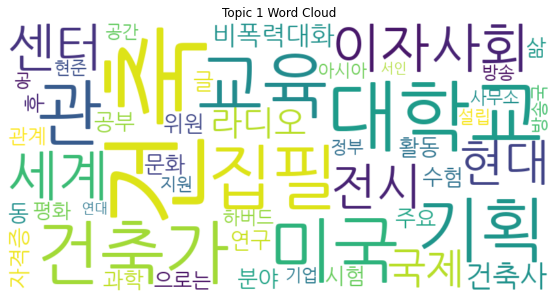

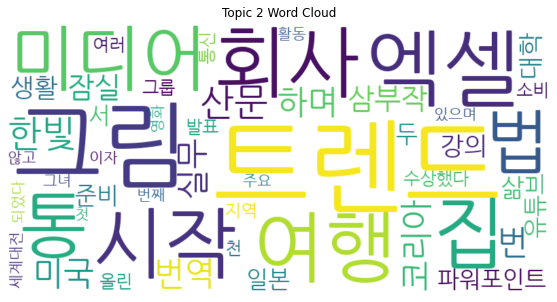

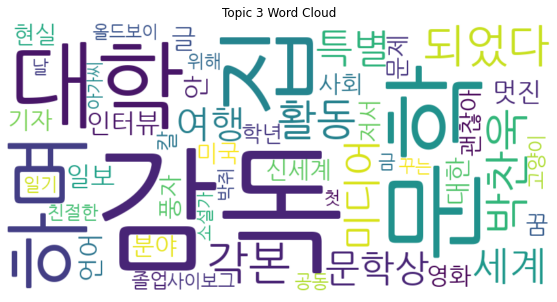

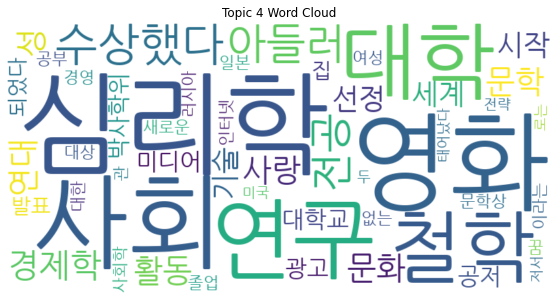

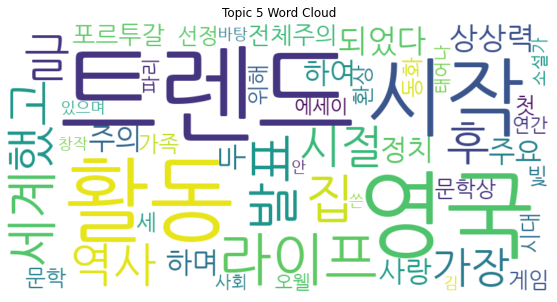

In [13]:
# 워드클라우드 코드 (각자 조정)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Generate word cloud for each topic
for topic_idx in range(num_topics):
    topic_words = lda_model.show_topic(topic_idx, topn=50)
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(dict(topic_words))
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Topic {topic_idx+1} Word Cloud")
    plt.axis('off')
    plt.show()